#**Sentiment Analysis for Relive App Review**

A continuation from the review scraping in `03-relive-reviews-exploratory-data-analysis.ipynb`, which you can access [here](https://colab.research.google.com/drive/1GIO8ch4BaGwC5zDlr2ulOjXwqZ_6yHjS?usp=sharing)

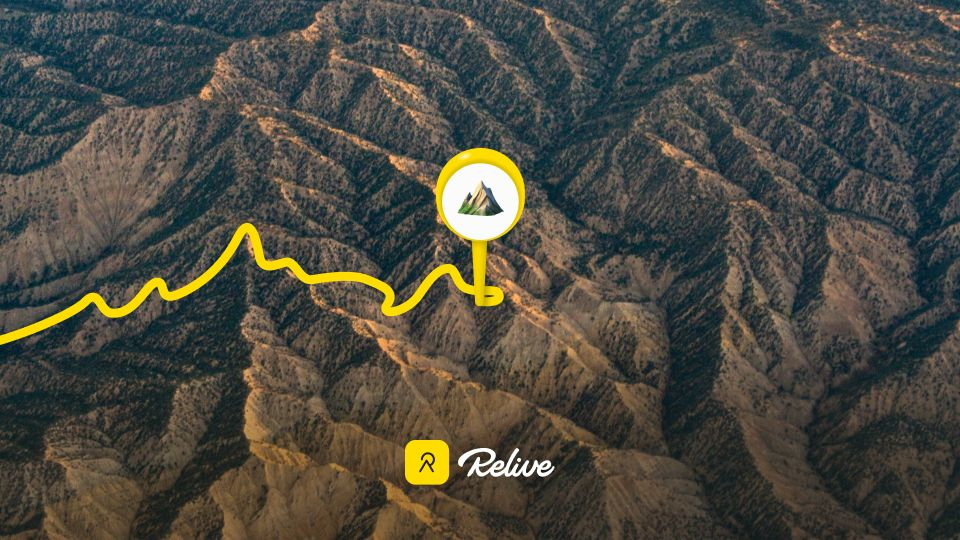
---



##Dataset Loading

In [ ]:
# prompt: ambil df_reliverev_clean_clean dari drive /Data

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df_reliverev_clean_clean = pd.read_csv('/content/drive/MyDrive/Data/df_reliverev_clean_clean')

Mounted at /content/drive


In [ ]:
df_reliverev_clean_clean.head()

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,tokenized_content,lower_tokenized_content,removed_stopwords_content,lemmatized_content,stemmed_content,cleaned_content,expanded_cleaned_content,spell_corrected_content,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common,word_difference
0,71f966cc-b905-4d92-9662-267512516332,"Good app, but I wish for upgrade in UI and som...",4,0,2025-03-11 11:58:45,NaN,NaN,"['Good', 'app', ',', 'but', 'I', 'wish', 'for'...","['good', 'app', ',', 'but', 'i', 'wish', 'for'...","['good', 'app', ',', 'wish', 'upgrade', 'ui', ...","['good', 'app', ',', 'wish', 'upgrade', 'ui', ...","['good', 'app', ',', 'wish', 'upgrad', 'ui', '...",good app wish upgrad ui featur soon,good app wish upgrad ui featur soon,good app wish upgrade i feature soon,good app wish upgrade i feature soon,good app wish upgrade feature soon,{'i'}
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,accurate details,4,0,2025-03-11 00:24:19,NaN,NaN,"['accurate', 'details']","['accurate', 'details']","['accurate', 'details']","['accurate', 'detail']","['accur', 'detail']",accur detail,accur detail,occur detail,occur,occur,set()
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,"Paid for this last year at 50% off, its just r...",2,0,2025-03-10 14:14:45,NaN,NaN,"['Paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'last', 'year', '50', '%', ',', 'rene...","['paid', 'last', 'year', '50', '%', ',', 'rene...","['paid', 'last', 'year', '50', '%', ',', 'rene...",paid last year 50 renew £32 warn whatsoev r...,paid last year 50 renew £32 warn whatsoev r...,paid last year renew warn whatsoever refund ac...,paid last year refund email absolute,paid last year refund email absolute,set()
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,"It's a very good application for me, so try it...",5,0,2025-03-10 12:45:46,NaN,NaN,"['It', ""'s"", 'a', 'very', 'good', 'application...","['it', ""'s"", 'a', 'very', 'good', 'application...","[""'s"", 'good', 'application', ',', 'try', 'fol...","[""'s"", 'good', 'application', ',', 'try', 'folk']","[""'s"", 'good', 'applic', ',', 'tri', 'folk']",s good applic tri folk,s good applic tri folk,a good apply try folk,a good apply try,good apply try,{'a'}
4,d238c089-b972-4155-abdb-b26a5f285134,Ohsem,5,0,2025-03-09 05:45:56,NaN,NaN,['Ohsem'],['ohsem'],['ohsem'],['ohsem'],['ohsem'],ohsem,ohsem,them,NaN,NaN,set()


In [ ]:
df_reliverev_clean_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21619 entries, 0 to 21618
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   reviewId                                   21619 non-null  object
 1   content                                    21619 non-null  object
 2   score                                      21619 non-null  int64 
 3   thumbsUpCount                              21619 non-null  int64 
 4   at                                         21619 non-null  object
 5   replyContent                               653 non-null    object
 6   repliedAt                                  653 non-null    object
 7   tokenized_content                          21619 non-null  object
 8   lower_tokenized_content                    21619 non-null  object
 9   removed_stopwords_content                  21619 non-null  object
 10  lemmatized_content                

##TextBlob Instalation

In [ ]:
from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_reliverev_clean['sentiment_polarity'] = df_reliverev_clean['spell_corrected_content_no_rare_no_common'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_reliverev_clean['sentiment_subjective'] = df_reliverev_clean['spell_corrected_content_no_rare_no_common'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [ ]:

df_reliverev_clean['sentiment_rating'] = df_reliverev_clean['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df_reliverev_clean.loc[:,["spell_corrected_content_no_rare_no_common","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,spell_corrected_content_no_rare_no_common,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,good app wish upgrade feature soon,4,0.7,0.600000,Positive
1,occur,4,0.0,0.000000,Positive
2,paid last year refund email absolute,2,0.1,0.483333,Negative
3,good apply try,5,0.7,0.600000,Positive
4,NaN,5,0.0,0.000000,Positive
...,...,...,...,...,...
21614,awesome ride,5,1.0,1.000000,Positive
21615,far good,5,0.4,0.800000,Positive
21616,love app fantast,5,0.5,0.600000,Positive
21617,brilliant need app relic thank,5,0.9,1.000000,Positive


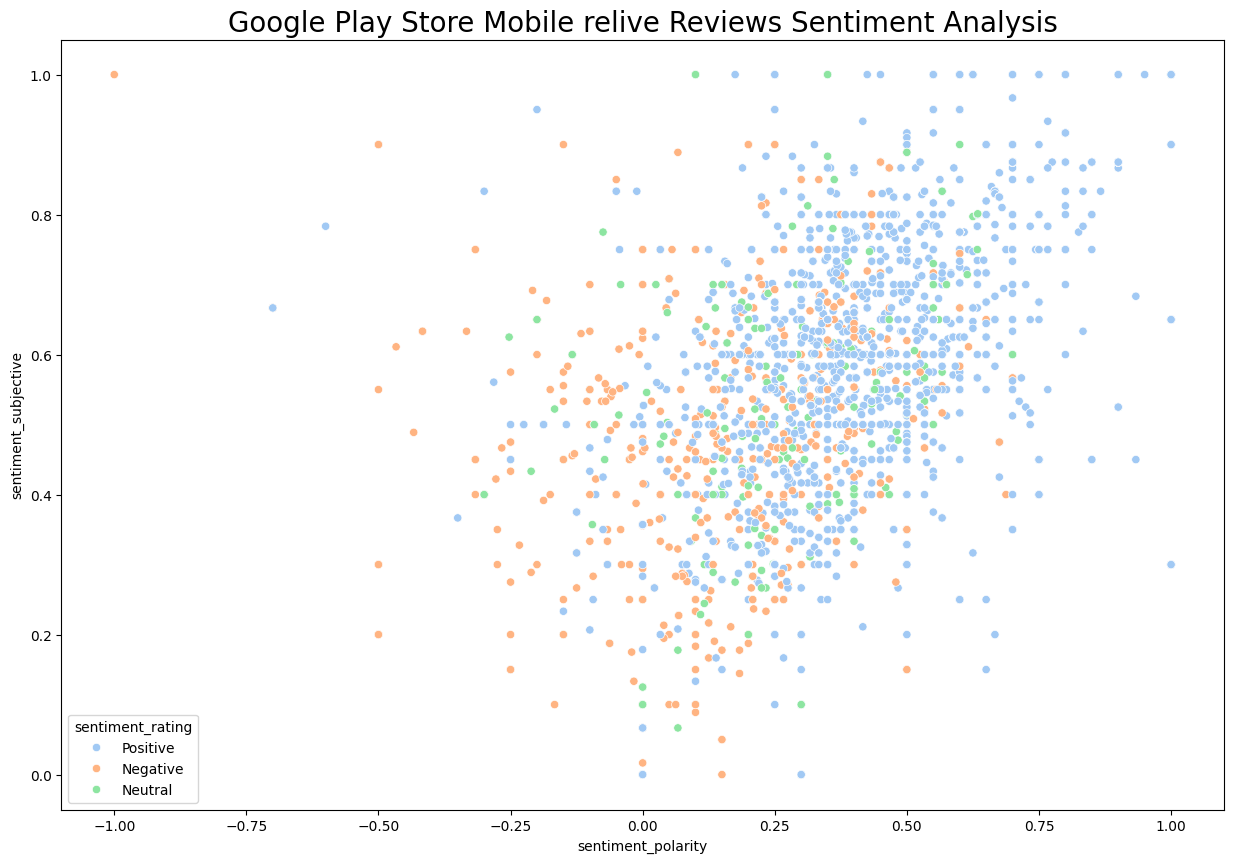

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_reliverev_clean['sentiment_polarity'], y=df_reliverev_clean['sentiment_subjective'],
                hue=df_reliverev_clean['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile relive Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  # Filter out non-string values before joining
  all_words = ' '.join([str(text) for text in x if isinstance(text, str)])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-16-925373519>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


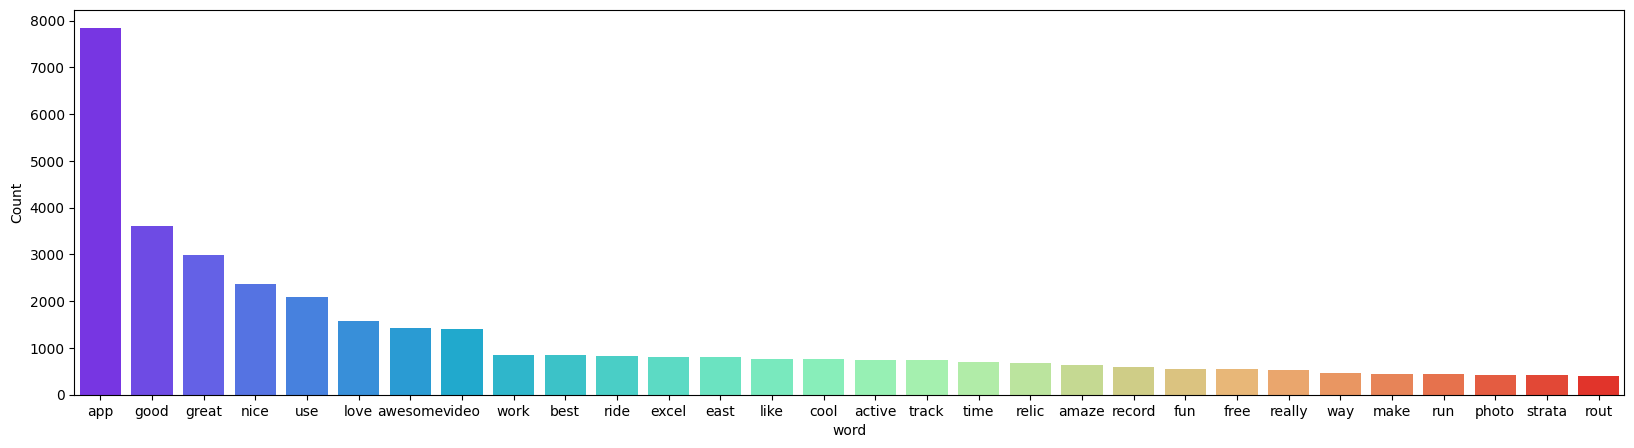

In [ ]:
freq_words(df_reliverev_clean['spell_corrected_content_no_rare_no_common'])

Rating

In [ ]:
df_reliverev_clean

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,tokenized_content,lower_tokenized_content,removed_stopwords_content,...,stemmed_content,cleaned_content,expanded_cleaned_content,spell_corrected_content,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common,word_difference,sentiment_polarity,sentiment_subjective,sentiment_rating
0,71f966cc-b905-4d92-9662-267512516332,"Good app, but I wish for upgrade in UI and som...",4,0,2025-03-11 11:58:45,NaN,NaN,"['Good', 'app', ',', 'but', 'I', 'wish', 'for'...","['good', 'app', ',', 'but', 'i', 'wish', 'for'...","['good', 'app', ',', 'wish', 'upgrade', 'ui', ...",...,"['good', 'app', ',', 'wish', 'upgrad', 'ui', '...",good app wish upgrad ui featur soon,good app wish upgrad ui featur soon,good app wish upgrade i feature soon,good app wish upgrade i feature soon,good app wish upgrade feature soon,{'i'},0.7,0.600000,Positive
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,accurate details,4,0,2025-03-11 00:24:19,NaN,NaN,"['accurate', 'details']","['accurate', 'details']","['accurate', 'details']",...,"['accur', 'detail']",accur detail,accur detail,occur detail,occur,occur,set(),0.0,0.000000,Positive
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,"Paid for this last year at 50% off, its just r...",2,0,2025-03-10 14:14:45,NaN,NaN,"['Paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'last', 'year', '50', '%', ',', 'rene...",...,"['paid', 'last', 'year', '50', '%', ',', 'rene...",paid last year 50 renew £32 warn whatsoev r...,paid last year 50 renew £32 warn whatsoev r...,paid last year renew warn whatsoever refund ac...,paid last year refund email absolute,paid last year refund email absolute,set(),0.1,0.483333,Negative
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,"It's a very good application for me, so try it...",5,0,2025-03-10 12:45:46,NaN,NaN,"['It', ""'s"", 'a', 'very', 'good', 'application...","['it', ""'s"", 'a', 'very', 'good', 'application...","[""'s"", 'good', 'application', ',', 'try', 'fol...",...,"[""'s"", 'good', 'applic', ',', 'tri', 'folk']",s good applic tri folk,s good applic tri folk,a good apply try folk,a good apply try,good apply try,{'a'},0.7,0.600000,Positive
4,d238c089-b972-4155-abdb-b26a5f285134,Ohsem,5,0,2025-03-09 05:45:56,NaN,NaN,['Ohsem'],['ohsem'],['ohsem'],...,['ohsem'],ohsem,ohsem,them,NaN,NaN,set(),0.0,0.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,bf98d323-2b31-4df8-a3f7-446e0d00748e,Awesome.. has all my rides,5,0,2017-03-26 05:55:08,NaN,NaN,"['Awesome', '..', 'has', 'all', 'my', 'rides']","['awesome', '..', 'has', 'all', 'my', 'rides']","['awesome', '..', 'rides']",...,"['awesom', '..', 'ride']",awesom ride,awesom ride,awesome ride,awesome ride,awesome ride,set(),1.0,1.000000,Positive
21615,903af083-7b12-4708-bc25-31c779b4ff6d,"So far, very good.",5,0,2017-03-26 01:39:03,NaN,NaN,"['So', 'far', ',', 'very', 'good', '.']","['so', 'far', ',', 'very', 'good', '.']","['far', ',', 'good', '.']",...,"['far', ',', 'good', '.']",far good,far good,far good,far good,far good,set(),0.4,0.800000,Positive
21616,44ed2bef-eca5-4b36-93e2-dde154698632,Love the app. Fantastic....,5,0,2017-03-25 08:24:47,NaN,NaN,"['Love', 'the', 'app', '.', 'Fantastic', '....']","['love', 'the', 'app', '.', 'fantastic', '....']","['love', 'app', '.', 'fantastic', '....']",...,"['love', 'app', '.', 'fantast', '....']",love app fantast,love app fantast,love app fantast,love app fantast,love app fantast,set(),0.5,0.600000,Positive
21617,a77422c6-b008-484f-a1a8-5a816fbd9397,"Brilliant, just what was needed adding the app...",5,1,2017-03-23 18:20:09,NaN,NaN,"['Brilliant', ',', 'just', 'what', 'was', 'nee...","['brilliant', ',', 'just', 'what', 'was', 'nee...","['brilliant', ',', 'needed', 'adding', 'app', ...",...,"['brilliant', ',', 'need', 'ad', 'app', '.', '...",brilliant need ad app noth prais team reliv ...,brilliant need ad app noth prais team reliv ...,brill

#EDA

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# import pandas_profiling as pp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_reliverev_clean.sample(5)

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,tokenized_content,lower_tokenized_content,removed_stopwords_content,...,stemmed_content,cleaned_content,expanded_cleaned_content,spell_corrected_content,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common,word_difference,sentiment_polarity,sentiment_subjective,sentiment_rating
9595,5155a738-ebcf-461f-8e3e-ee95c5821fe6,Nice,5,0,2020-12-03 12:04:36,NaN,NaN,['Nice'],['nice'],['nice'],...,['nice'],nice,nice,nice,nice,nice,set(),0.6,1.0,Positive
1884,102e28cf-1680-4cc2-bb36-c64931f105ae,Very good 😊,5,0,2023-04-13 22:23:58,NaN,NaN,"['Very', 'good', '😊']","['very', 'good', '😊']","['good', '😊']",...,"['good', '😊']",good 😊,good 😊,good,good,good,set(),0.7,0.6,Positive
14441,e2b9fae9-7ccb-4238-a294-4f0e558dfcea,Motivates me to get my ass up and run!,5,0,2020-06-01 17:03:24,NaN,NaN,"['Motivates', 'me', 'to', 'get', 'my', 'ass', ...","['motivates', 'me', 'to', 'get', 'my', 'ass', ...","['motivates', 'get', 'ass', 'run', '!']",...,"['motiv', 'get', 'as', 'run', '!']",motiv get as run,motiv get as run,motif get as run,motif get run,motif get run,set(),0.0,0.0,Positive
3557,bfff906b-a3f7-4f1a-b4c8-26ffb6edff82,Perfect,5,0,2022-04-01 00:57:44,NaN,NaN,['Perfect'],['perfect'],['perfect'],...,['perfect'],perfect,perfect,perfect,perfect,perfect,set(),1.0,1.0,Positive
428,38ae7c5e-a8b3-47d6-91bd-9b190cff177b,Nice 👍,4,0,2024-09-09 10:49:27,NaN,NaN,"['Nice', '👍']","['nice', '👍']","['nice', '👍']",...,"['nice', '👍']",nice 👍,nice 👍,nice,nice,nice,set(),0.6,1.0,Positive


In [ ]:
df_reliverev_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21619 entries, 0 to 21618
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   reviewId                                   21619 non-null  object 
 1   content                                    21619 non-null  object 
 2   score                                      21619 non-null  int64  
 3   thumbsUpCount                              21619 non-null  int64  
 4   at                                         21619 non-null  object 
 5   replyContent                               653 non-null    object 
 6   repliedAt                                  653 non-null    object 
 7   tokenized_content                          21619 non-null  object 
 8   lower_tokenized_content                    21619 non-null  object 
 9   removed_stopwords_content                  21619 non-null  object 
 10  lemmatized_content    

In [ ]:
df_reliverev_clean.isnull().sum()

,0
reviewId,0
content,0
score,0
thumbsUpCount,0
at,0
replyContent,20966
repliedAt,20966
tokenized_content,0
lower_tokenized_content,0
removed_stopwords_content,0


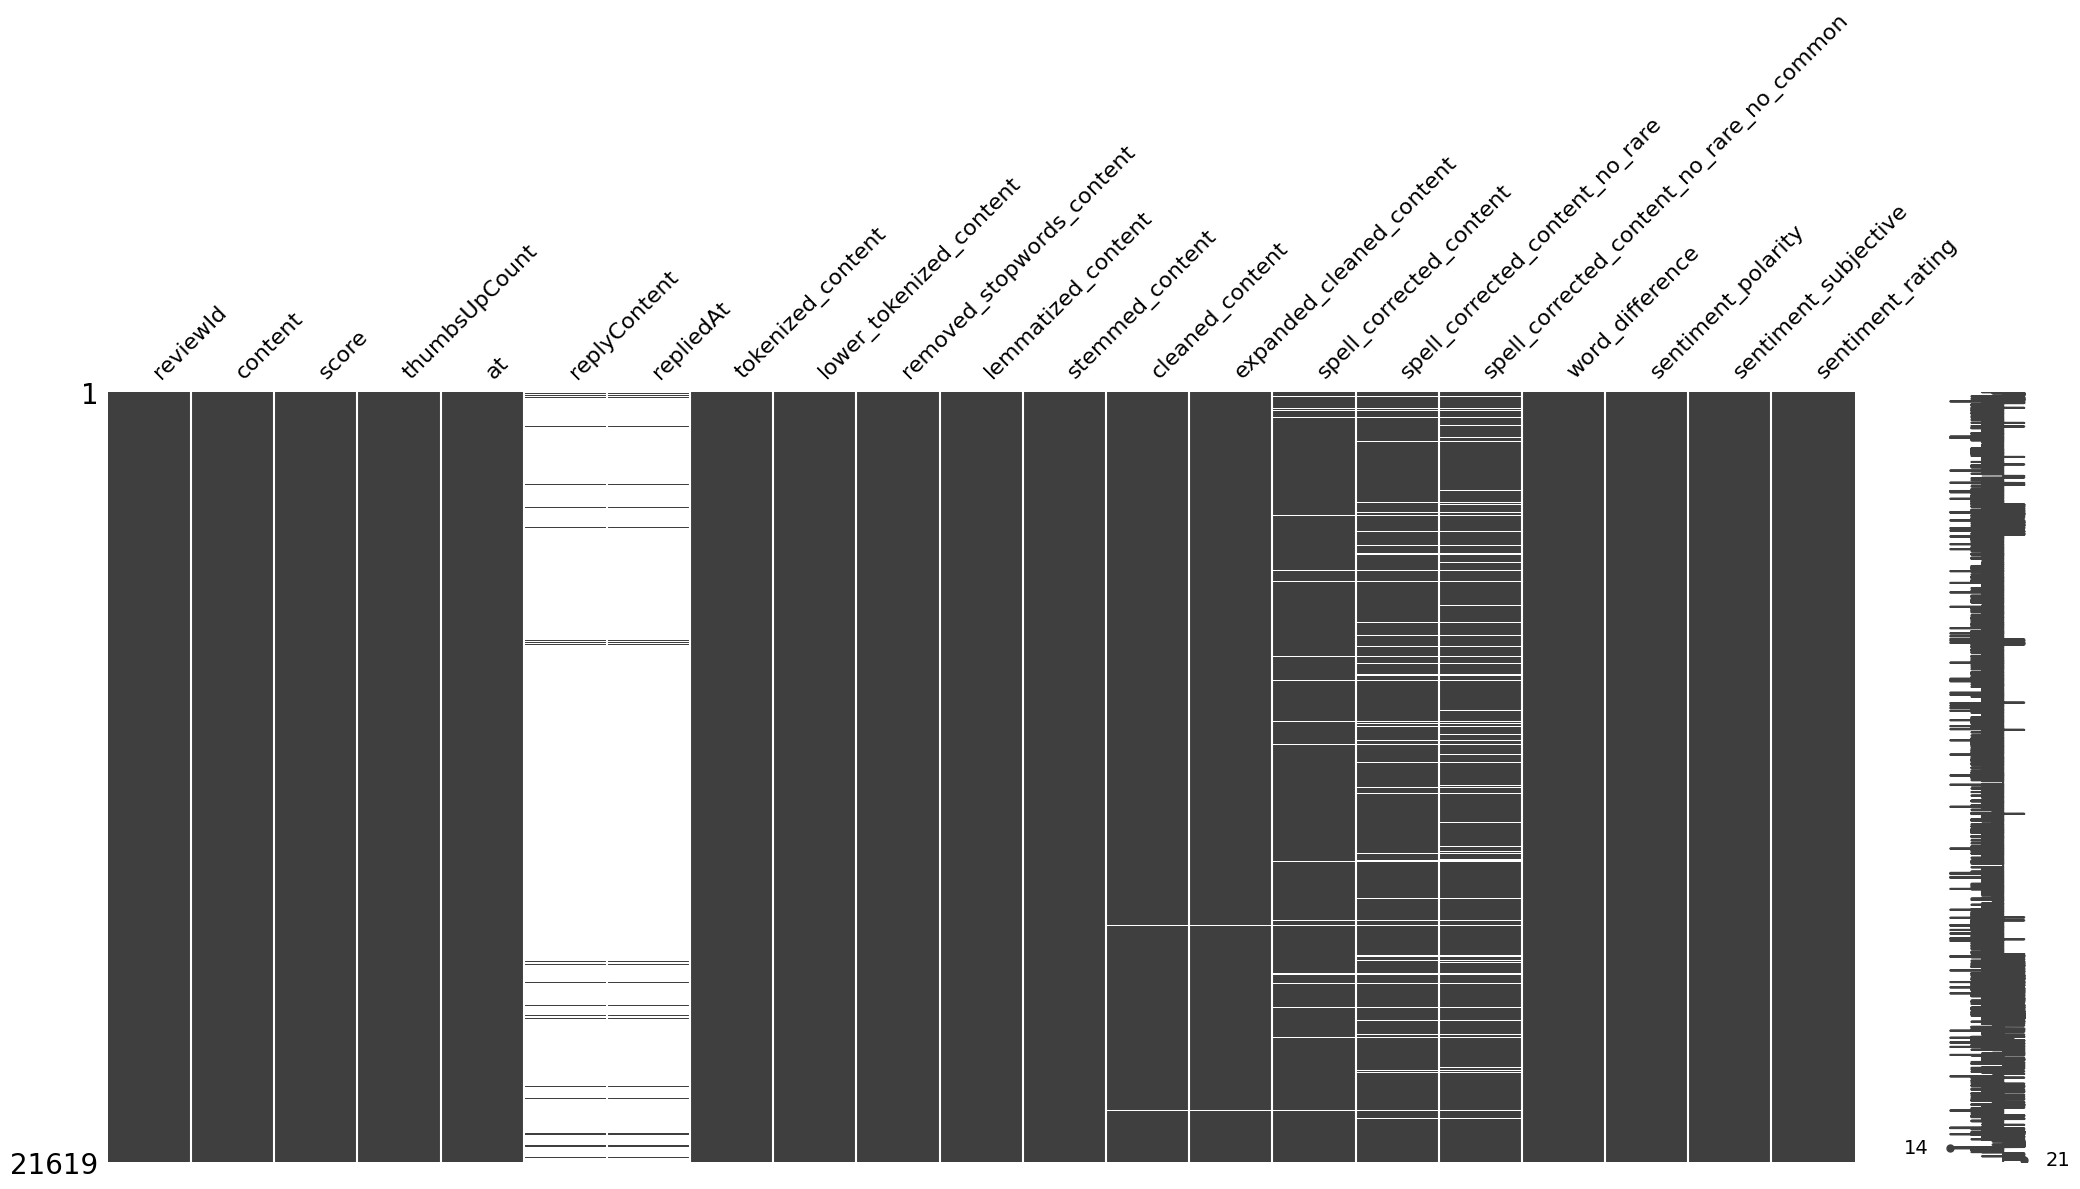

In [ ]:
import missingno as msno
msno.matrix(df_reliverev_clean)
plt.show()

In [ ]:
df_reliverev_clean['at'] = pd.to_datetime(df_reliverev_clean['at'])
df_reliverev_clean['year'] = df_reliverev_clean['at'].dt.year

# Select only the desired columns
df_selected = df_reliverev_clean[['content', 'spell_corrected_content_no_rare_no_common', 'score', 'sentiment_rating', 'at', 'year']]

# Display the selected columns
df_selected


,content,spell_corrected_content_no_rare_no_common,score,sentiment_rating,at,year
0,"Good app, but I wish for upgrade in UI and som...",good app wish upgrade feature soon,4,Positive,2025-03-11 11:58:45,2025
1,accurate details,occur,4,Positive,2025-03-11 00:24:19,2025
2,"Paid for this last year at 50% off, its just r...",paid last year refund email absolute,2,Negative,2025-03-10 14:14:45,2025
3,"It's a very good application for me, so try it...",good apply try,5,Positive,2025-03-10 12:45:46,2025
4,Ohsem,NaN,5,Positive,2025-03-09 05:45:56,2025
...,...,...,...,...,...,...
21614,Awesome.. has all my rides,awesome ride,5,Positive,2017-03-26 05:55:08,2017
21615,"So far, very good.",far good,5,Positive,2017-03-26 01:39:03,2017
21616,Love the app. Fantastic....,love app fantast,5,Positive,2017-03-25 08:24:47,2017
21617,"Brilliant, just what was needed adding the app...",brilliant need app relic thank,5,Positive,2017-03-23 18:20:09,2017


In [ ]:
df_reliverev_clean = df_reliverev_clean.drop(['reviewId', 'userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'], axis=1, errors='ignore')

# Print the updated DataFrame to verify the columns have been removed
df_reliverev_clean


,content,score,thumbsUpCount,at,tokenized_content,lower_tokenized_content,removed_stopwords_content,lemmatized_content,stemmed_content,cleaned_content,expanded_cleaned_content,spell_corrected_content,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common,word_difference,sentiment_polarity,sentiment_subjective,sentiment_rating,year
0,"Good app, but I wish for upgrade in UI and som...",4,0,2025-03-11 11:58:45,"['Good', 'app', ',', 'but', 'I', 'wish', 'for'...","['good', 'app', ',', 'but', 'i', 'wish', 'for'...","['good', 'app', ',', 'wish', 'upgrade', 'ui', ...","['good', 'app', ',', 'wish', 'upgrade', 'ui', ...","['good', 'app', ',', 'wish', 'upgrad', 'ui', '...",good app wish upgrad ui featur soon,good app wish upgrad ui featur soon,good app wish upgrade i feature soon,good app wish upgrade i feature soon,good app wish upgrade feature soon,{'i'},0.7,0.600000,Positive,2025
1,accurate details,4,0,2025-03-11 00:24:19,"['accurate', 'details']","['accurate', 'details']","['accurate', 'details']","['accurate', 'detail']","['accur', 'detail']",accur detail,accur detail,occur detail,occur,occur,set(),0.0,0.000000,Positive,2025
2,"Paid for this last year at 50% off, its just r...",2,0,2025-03-10 14:14:45,"['Paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'for', 'this', 'last', 'year', 'at', ...","['paid', 'last', 'year', '50', '%', ',', 'rene...","['paid', 'last', 'year', '50', '%', ',', 'rene...","['paid', 'last', 'year', '50', '%', ',', 'rene...",paid last year 50 renew £32 warn whatsoev r...,paid last year 50 renew £32 warn whatsoev r...,paid last year renew warn whatsoever refund ac...,paid last year refund email absolute,paid last year refund email absolute,set(),0.1,0.483333,Negative,2025
3,"It's a very good application for me, so try it...",5,0,2025-03-10 12:45:46,"['It', ""'s"", 'a', 'very', 'good', 'application...","['it', ""'s"", 'a', 'very', 'good', 'application...","[""'s"", 'good', 'application', ',', 'try', 'fol...","[""'s"", 'good', 'application', ',', 'try', 'folk']","[""'s"", 'good', 'applic', ',', 'tri', 'folk']",s good applic tri folk,s good applic tri folk,a good apply try folk,a good apply try,good apply try,{'a'},0.7,0.600000,Positive,2025
4,Ohsem,5,0,2025-03-09 05:45:56,['Ohsem'],['ohsem'],['ohsem'],['ohsem'],['ohsem'],ohsem,ohsem,them,NaN,NaN,set(),0.0,0.000000,Positive,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,Awesome.. has all my rides,5,0,2017-03-26 05:55:08,"['Awesome', '..', 'has', 'all', 'my', 'rides']","['awesome', '..', 'has', 'all', 'my', 'rides']","['awesome', '..', 'rides']","['awesome', '..', 'ride']","['awesom', '..', 'ride']",awesom ride,awesom ride,awesome ride,awesome ride,awesome ride,set(),1.0,1.000000,Positive,2017
21615,"So far, very good.",5,0,2017-03-26 01:39:03,"['So', 'far', ',', 'very', 'good', '.']","['so', 'far', ',', 'very', 'good', '.']","['far', ',', 'good', '.']","['far', ',', 'good', '.']","['far', ',', 'good', '.']",far good,far good,far good,far good,far good,set(),0.4,0.800000,Positive,2017
21616,Love the app. Fantastic....,5,0,2017-03-25 08:24:47,"['Love', 'the', 'app', '.', 'Fantastic', '....']","['love', 'the', 'app', '.', 'fantastic', '....']","['love', 'app', '.', 'fantastic', '....']","['love', 'app', '.', 'fantastic', '....']","['love', 'app', '.', 'fantast', '....']",love app fantast,love app fantast,love app fantast,love app fantast,love app fantast,set(),0.5,0.600000,Positive,2017
21617,"Brilliant, just what was needed adding the app...",5,1,2017-03-23 18:20:09,"['Brilliant', ',', 'just', 'what', 'was', 'nee...","['brilliant', ',', 'just', 'what', 'was', 'nee...","['brilliant', ',', 'needed', 'adding', 'app', ...","['brilliant', ',', 'needed', 'adding', 'app', ...","['brilliant', ',', 'need', 'ad', 'app', '.', '...",brilliant need ad app noth prais team reliv ...,brilliant need ad app noth prais team reliv ...,brilliant need and app not paris team relic th...,brilliant need and app not reli

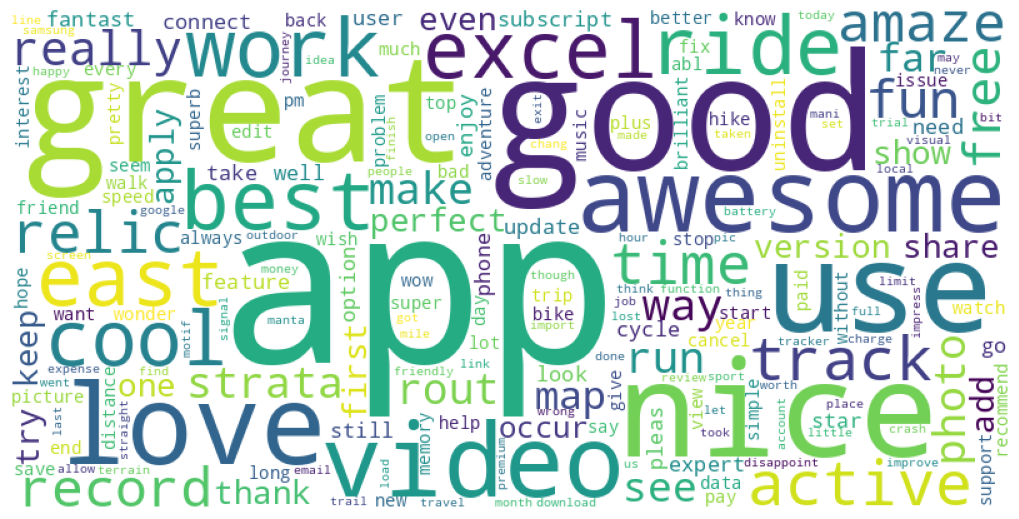

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df_reliverev_clean['spell_corrected_content_no_rare_no_common'].dropna().astype(str))

# Create a WordCloud object with unique word functionality
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      collocations=False).generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


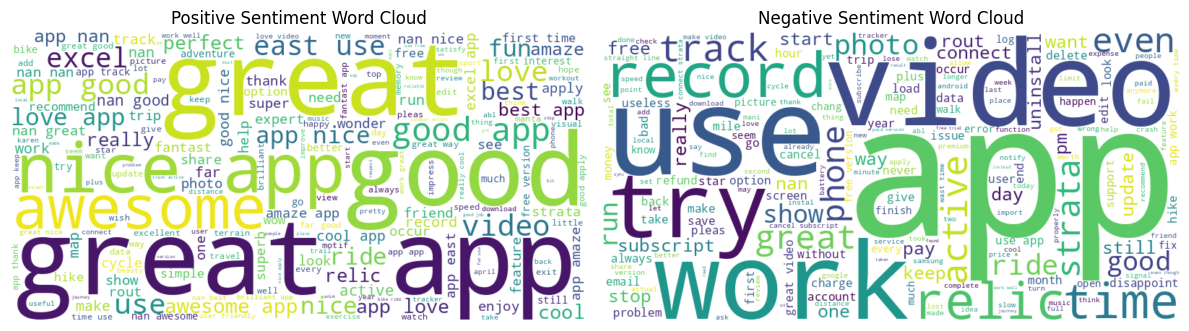

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate reviews into positive and negative sentiment groups
positive_reviews = df_reliverev_clean[df_reliverev_clean['sentiment_rating'] == 'Positive']['spell_corrected_content_no_rare_no_common'].astype(str)
negative_reviews = df_reliverev_clean[df_reliverev_clean['sentiment_rating'] == 'Negative']['spell_corrected_content_no_rare_no_common'].astype(str)

# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis("off")

plt.tight_layout()
plt.show()


<ipython-input-32-2160245782>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




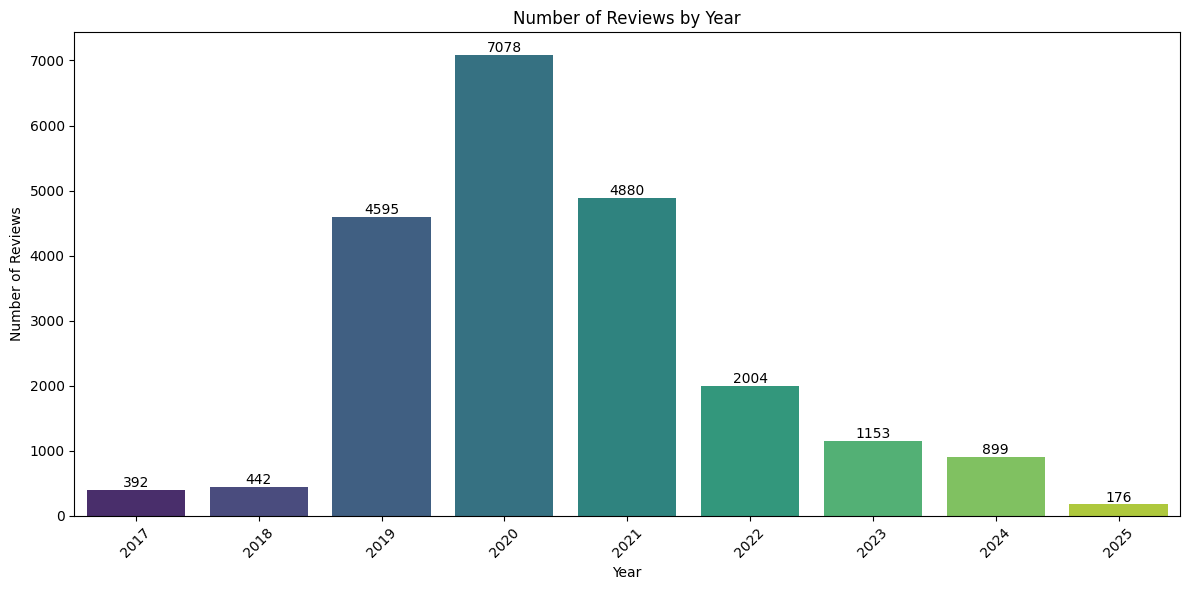

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and count the number of reviews
reviews_by_year = df_reliverev_clean.groupby('year')['content'].count()

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, palette="viridis")  # Use 'viridis' for a gradient colormap

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Year")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


<ipython-input-33-103097054>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




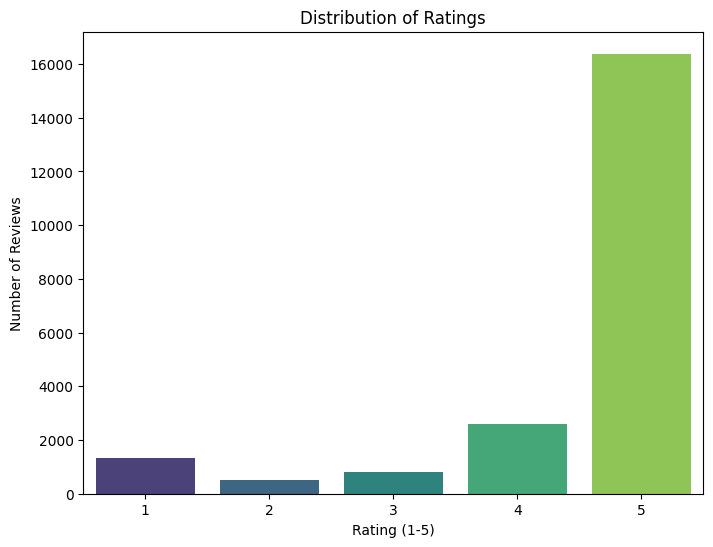

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_reliverev_clean' is your DataFrame and 'score' column contains the ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df_reliverev_clean, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.show()


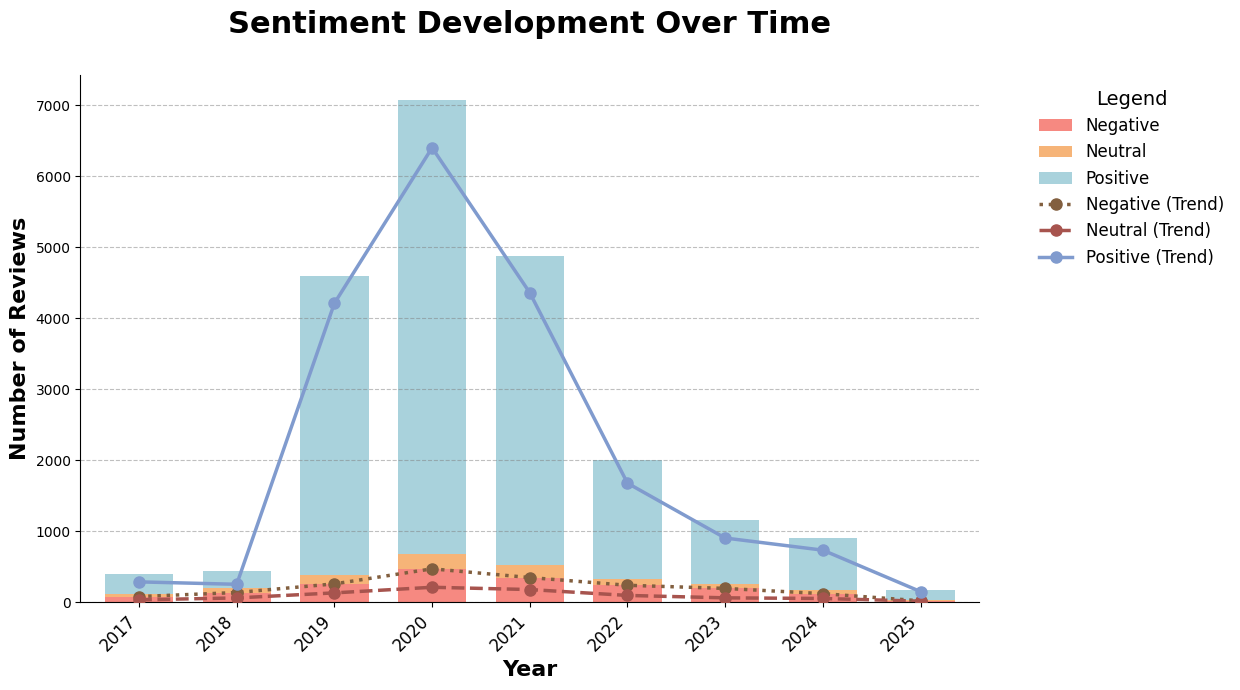

In [ ]:
# 1. Group by year and sentiment rating for stacked bars
sentiment_over_time = df_reliverev_clean.groupby(['year', 'sentiment_rating']).size().unstack(fill_value=0)

# Ensure sentiment columns are in a consistent order for stacking and coloring
sentiment_columns_order = ['Negative', 'Neutral', 'Positive']
for col in sentiment_columns_order:
    if col not in sentiment_over_time.columns:
        sentiment_over_time[col] = 0
sentiment_over_time = sentiment_over_time[sentiment_columns_order]

# 2. Calculate total reviews per year (masih berguna jika ingin plot garis total)
total_reviews_per_year = df_reliverev_clean.groupby('year').size()


# --- DEFINISI PALET WARNA KUSTOM EDGY (dari kode yang Anda berikan) ---
stacked_bar_colors = {
    'Negative': '#f57c73',  # Merah
    'Neutral': '#f6ac69',   # Oranye
    'Positive': '#a0ced9'   # Biru muda
}
plot_bar_colors = [stacked_bar_colors[col] for col in sentiment_over_time.columns]

# --- DEFINISI GAYA GARIS UNTUK SETIAP SENTIMEN ---
# Menggunakan warna yang mirip dengan bar, tetapi dengan gaya dan marker berbeda
line_styles_for_sentiments = {
    'Positive': {'color': '#809bce', 'marker': 'o', 'linestyle': '-', 'label_suffix': ' (Trend)'}, # Merah, kotak, solid
    'Neutral': {'color': '#a7544e', 'marker': 'o', 'linestyle': '--', 'label_suffix': ' (Trend)'},  # Oranye, segitiga, dashed
    'Negative': {'color': '#825f3f', 'marker': 'o', 'linestyle': ':', 'label_suffix': ' (Trend)'}   # Biru muda, lingkaran, dotted
}


# Membuat figure dan axes untuk plot
plt.figure(figsize=(14, 7))
ax = plt.gca() # Dapatkan current axes

# --- 1. PLOT STACKED BAR CHART ---
sentiment_over_time.plot(kind='bar',
                         stacked=True,
                         ax=ax,
                         color=plot_bar_colors, # Menambahkan edgecolor untuk bar
                         linewidth=0.5,     # Ketebalan edgecolor
                         alpha=0.9,
                         width=0.7)


# --- 2. PLOT INDIVIDUAL LINES FOR EACH SENTIMENT ---
# Posisi X untuk garis, sejajar dengan pusat setiap kelompok bar
x_positions_for_lines = np.arange(len(sentiment_over_time.index))

# Loop melalui setiap sentimen untuk membuat garisnya
for sentiment in sentiment_columns_order:
    ax.plot(x_positions_for_lines, sentiment_over_time[sentiment].values,
            color=line_styles_for_sentiments[sentiment]['color'],
            marker=line_styles_for_sentiments[sentiment]['marker'],
            markersize=8,
            linewidth=2.5, # Garis agak tebal
            linestyle=line_styles_for_sentiments[sentiment]['linestyle'],
            label=f'{sentiment}{line_styles_for_sentiments[sentiment]["label_suffix"]}', # Label di legenda
            zorder=4) # Pastikan garis ada di atas bar


# Menambahkan judul plot dan label sumbu
plt.title('Sentiment Development Over Time',
          fontsize=22, fontweight='bold', pad=30)
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=16, fontweight='bold')

# Menambahkan gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')


# Mengatur ticks sumbu X
plt.xticks(x_positions_for_lines, sentiment_over_time.index, rotation=45, ha='right', fontsize=12)


# Menyesuaikan legenda
handles, labels = ax.get_legend_handles_labels()

# Urutkan label di legenda: Bar (Negative, Neutral, Positive), lalu Garis (Negative Trend, Neutral Trend, Positive Trend)
desired_label_order = sentiment_columns_order + [f'{s}{line_styles_for_sentiments[s]["label_suffix"]}' for s in sentiment_columns_order]
ordered_handles = []
ordered_labels = []
for lbl in desired_label_order:
    if lbl in labels:
        idx = labels.index(lbl)
        ordered_handles.append(handles[idx])
        ordered_labels.append(labels[idx])

ax.legend(ordered_handles, ordered_labels, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=12, title_fontsize=14, frameon=False)

# Menghilangkan bingkai atas dan kanan plot
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Menyesuaikan tata letak plot
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Menampilkan plot
plt.show()
